<img src="https://i.ytimg.com/vi/lXcO3y_YGOM/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLCvsAQKXnImSXOv5QNLmN9mBtRHbg"
    style="width:500px; float: right; margin: 0 80px 80px 80px;"></img>

# movie recommendation system

create project with data **top10K-TMDB-movies** the data contain .

the step of project :
* show Data and cleaning the Data
* visulization Data
* create popularity movie by years
* create Tfidf Vectorizer and cosine_similarity

After create this steps the model then create function to show best 10 movie for recommender movie.

## import library :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

# show data

In [ ]:
# show data in data frame 
movies=pd.read_csv(r"C:\Users\Downloads\ytube\top10K-TMDB-movies.csv")
movies.head(10)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811
5,667257,Impossible Things,"Family,Drama",es,"Matilde is a woman who, after the death of her...",14.358,2021-06-17,8.6,255
6,129,Spirited Away,"Animation,Family,Fantasy",ja,"A young girl, Chihiro, becomes trapped in a st...",92.056,2001-07-20,8.5,13093
7,730154,Your Eyes Tell,"Romance,Drama",ja,"A tragic accident lead to Kaori's blindness, b...",51.345,2020-10-23,8.5,339
8,372754,Dou kyu sei – Classmates,"Romance,Animation",ja,"Rihito Sajo, an honor student with a perfect s...",14.285,2016-02-20,8.5,239
9,372058,Your Name.,"Romance,Animation,Drama",ja,High schoolers Mitsuha and Taki are complete s...,158.270,2016-08-26,8.5,8895


## cleaning Data

In [4]:
# show information about data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [5]:
# show missing value
movies.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [6]:
# show null in genre col
null_genre_movies = movies[movies['genre'].isnull()]
null_genre_movies

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
3361,50472,Anplagghed al cinema,NaN,it,"A queue at the ATM machine, a displaced family...",4.420,2006-11-26,7.0,313
7821,43211,7 Kilos in 7 Days,NaN,it,Two not very clever young doctors open a fitne...,5.885,1986-02-02,6.0,212
8518,57114,"Amore, bugie e calcetto",NaN,en,NaN,4.709,2008-04-04,5.8,200


- After show in imdb web the missing value show the all null is replace with comdey

In [7]:
# Replace null values in the 'genre' column with 'Comedy'
movies['genre'].fillna('Comedy', inplace=True)

In [8]:
# remove null in all column
movies = movies.dropna()
movies.isnull().sum()

id                   0
title                0
genre                0
original_language    0
overview             0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

In [9]:
# show duplicate value
movies.duplicated().sum()

0

- After cleaningb now data dont have nul value or duplicated

In [10]:
# Convert release_date to datetime and extract the year
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['year'] = movies['release_date'].dt.year
movies

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,year
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,1994
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,1995
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,1972
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,1993
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,1974
...,...,...,...,...,...,...,...,...,...,...
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347,2010
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417,2015
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332,1990
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668,2007


In [11]:
# show decribe about Data
movies.describe().style.background_gradient(cmap = 'coolwarm')

,id,popularity,release_date,vote_average,vote_count,year
count,9987.000000,9987.000000,9987,9987.000000,9987.000000,9987.000000
mean,161284.290878,34.735569,2003-11-09 15:41:58.594172544,6.622720,1548.992090,2003.321518
min,5.000000,0.600000,1902-04-17 00:00:00,4.600000,200.000000,1902.000000
25%,10124.000000,9.167500,1997-02-14 00:00:00,6.100000,315.000000,1997.000000
50%,29787.000000,13.651000,2009-01-22 00:00:00,6.600000,585.000000,2009.000000
75%,310136.000000,25.679000,2016-01-14 00:00:00,7.200000,1462.000000,2016.000000
max,934761.000000,10436.917000,2022-07-13 00:00:00,8.700000,31917.000000,2022.000000
std,211481.776321,211.819251,nan,0.765183,2649.606898,17.072725


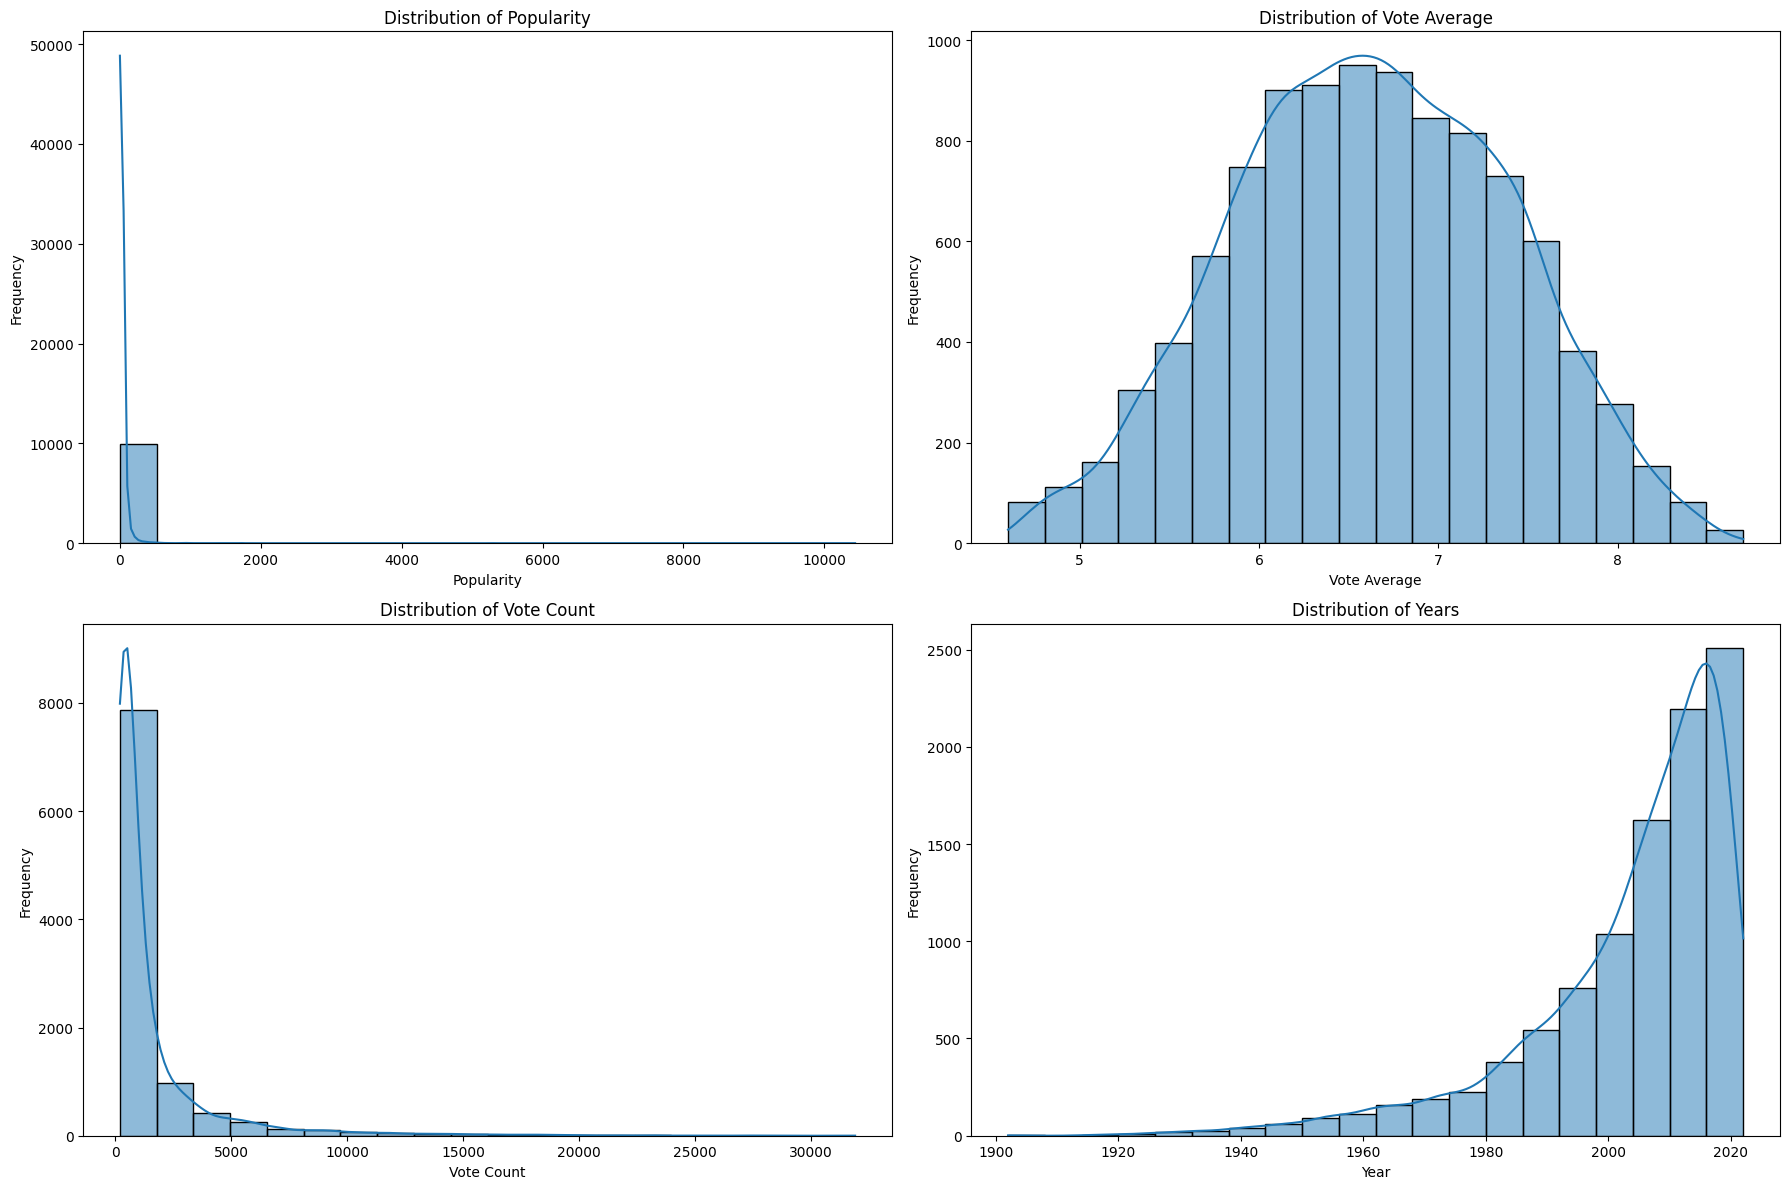

In [12]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Plot for 'popularity'
sns.histplot(movies['popularity'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Popularity')
axes[0, 0].set_xlabel('Popularity')
axes[0, 0].set_ylabel('Frequency')

# Plot for 'vote_average'
sns.histplot(movies['vote_average'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Vote Average')
axes[0, 1].set_xlabel('Vote Average')
axes[0, 1].set_ylabel('Frequency')

# Plot for 'vote_count'
sns.histplot(movies['vote_count'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Vote Count')
axes[1, 0].set_xlabel('Vote Count')
axes[1, 0].set_ylabel('Frequency')

# Plot for 'year'
sns.histplot(movies['year'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Years')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

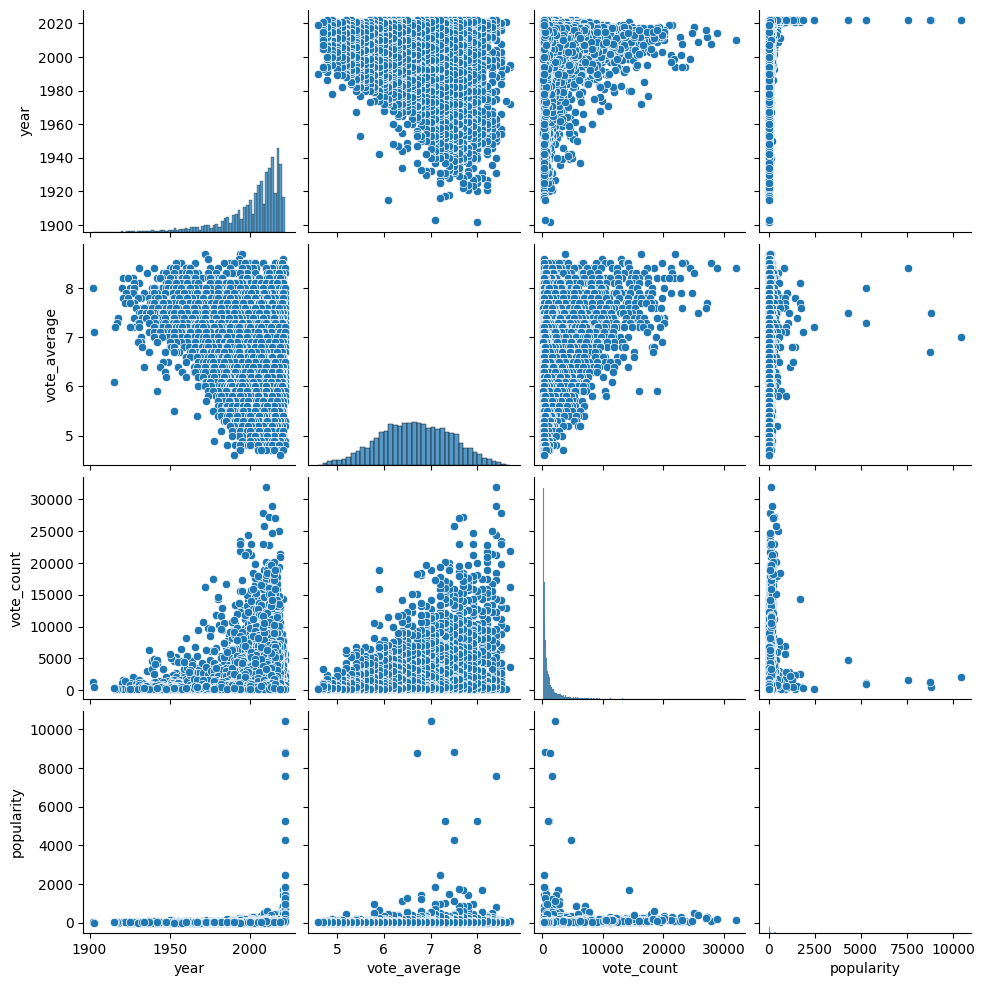

In [13]:
# create figure to represent ecah col with another
sns.pairplot(movies[['year' ,'vote_average', 'vote_count','popularity']])
plt.show()

In [14]:
# show namber of each value in col
movies["popularity"].value_counts()

popularity
0.600     7
8.220     5
10.399    5
10.276    5
13.577    5
         ..
5.446     1
17.710    1
9.181     1
25.106    1
16.482    1
Name: count, Length: 8499, dtype: int64

In [15]:
# show namber of each value in col with sort ascending
popularity_counts = movies['popularity'].value_counts().sort_index()
popularity_counts

popularity
0.600        7
0.665        1
0.730        1
1.133        1
1.209        1
            ..
5278.336     1
7567.017     1
8772.151     1
8821.801     1
10436.917    1
Name: count, Length: 8499, dtype: int64

## show popularity movie by years

In [16]:
# Acess multiple columns 
popularity_movie = movies[['title', 'vote_average', 'vote_count','year']]
popularity_movie

,title,vote_average,vote_count,year
0,The Shawshank Redemption,8.7,21862,1994
1,Dilwale Dulhania Le Jayenge,8.7,3731,1995
2,The Godfather,8.7,16280,1972
3,Schindler's List,8.6,12959,1993
4,The Godfather: Part II,8.6,9811,1974
...,...,...,...,...
9995,The Last Airbender,4.7,3347,2010
9996,Sharknado 3: Oh Hell No!,4.7,417,2015
9997,Captain America,4.6,332,1990
9998,In the Name of the King: A Dungeon Siege Tale,4.7,668,2007


In [17]:
# create function to show popularity in range year
def popular_years(df,start_year):
    # Filter movies by the year range
    movies_year_range = df[(df['year'] >= start_year) & (df['year'] <= start_year+5)]
    # Sort movies first by 'vote_average' (descending) and then by 'vote_count' (descending)
    popular_movies = movies_year_range[(movies_year_range['vote_average'] > 5) 
                                       & (movies_year_range['vote_count'] > 1000)].head(10)
    # Sort movies by 'vote_average' (descending) and then by 'vote_count' (descending)
    popular_movies = popular_movies.sort_values(by=['vote_average', 'vote_count'], ascending=[False, False]).head(10)
    
    # Select relevant columns and reset index
    result = popular_movies[['title', 'year', 'vote_average', 'vote_count']].reset_index(drop=True)
    
    return result

In [18]:
# test popularity per years
start_year = 2019
print(f"Popular movies from {start_year} until start {start_year+5}:")
popular_years(popularity_movie,start_year)

Popular movies from 2019 until start 2024:


,title,year,vote_average,vote_count
0,Parasite,2019,8.5,14036
1,Gabriel's Inferno,2020,8.5,2262
2,Gabriel's Inferno: Part II,2020,8.5,1420
3,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,2020,8.4,2564
4,Top Gun: Maverick,2022,8.4,1690
5,Avengers: Endgame,2019,8.3,21448
6,Five Feet Apart,2019,8.3,4819
7,Miracle in Cell No. 7,2019,8.3,3968
8,Justice League Dark: Apokolips War,2020,8.3,1189
9,Life in a Year,2020,8.3,1105


## recommendation system system

In [19]:
# diplay to show what the col select to create recomdation system
movies

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,year
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,1994
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,1995
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,1972
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,1993
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,1974
...,...,...,...,...,...,...,...,...,...,...
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347,2010
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417,2015
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332,1990
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668,2007


- selecte ('id', 'title', 'overview', 'genre') from all coluomn that effictive in recommender

In [20]:
# Selecte cloumn to apply model  
movies_recommend=movies[['id', 'title', 'overview', 'genre']]
movies_recommend

,id,title,overview,genre
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance"
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy"
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure"
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War"
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama"


In [21]:
# combied 2 column into Bag of words column
movies_recommend['Bag of words'] = movies_recommend['overview']+movies_recommend['genre']
movies_recommend

,id,title,overview,genre,Bag of words
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War",The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...


In [22]:
# delete 2 cloumn with inplace
movies_recommend.drop(columns=['overview', 'genre'], inplace=True)
movies_recommend

,id,title,Bag of words
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


### vectorization with TfidfVectorizer

In [23]:
# Fit and transform the documents into numpy array by TfidfVectorizer
vector_tfidf = TfidfVectorizer(stop_words='english').fit_transform(movies_recommend['Bag of words']).toarray()

# Display the shape of the array
print("the shape of vectors movie After Apply Tfidf:",vector_tfidf.shape)

the shape of vectors movie After Apply Tfidf: (9987, 28023)


In [24]:
# Calculate cosine similarity
similarity_Tfidf = cosine_similarity(vector_tfidf)
print("the shape of matrix after apply cosine similarity:",similarity_Tfidf.shape)
print("\nthe matrix after apply cosine similarity :\n",similarity_Tfidf)

the shape of matrix after apply cosine similarity: (9987, 9987)

the matrix after apply cosine similarity :
 [[1.         0.00978086 0.02126661 ... 0.04273694 0.0322935  0.02024281]
 [0.00978086 1.         0.00878596 ... 0.         0.00234235 0.        ]
 [0.02126661 0.00878596 1.         ... 0.01100079 0.01931107 0.01919859]
 ...
 [0.04273694 0.         0.01100079 ... 1.         0.00504817 0.00412743]
 [0.0322935  0.00234235 0.01931107 ... 0.00504817 1.         0.00687941]
 [0.02024281 0.         0.01919859 ... 0.00412743 0.00687941 1.        ]]


In [25]:
# create function to handel input moive to be equal in dataset
def preprocess_title(title):
    title = re.sub(r'[.,]', '', title)  # Remove periods and commas with Regular expression library
    title = title.strip()  # Remove leading and trailing spaces
    title = title.lower()  # Convert to lowercase
    return title

In [26]:
def recommand_Tfidf(movie_title):
    # Preprocess the input title
    processed_title = preprocess_title(movie_title)
    
    # Apply preprocessing to titles in the DataFrame for comparison
    movies_recommend['processed_title'] = movies_recommend['title'].apply(preprocess_title)
    
    # Find the index of the queried movie
    matched_titles = movies_recommend[movies_recommend['processed_title'] == processed_title]
    
    if matched_titles.empty:
        print(f"Movie '{movie_title}' not found in the dataset.")
        return
    
    index = matched_titles.index[0]

    # Calculate distances and sort by similarity, excluding the queried movie
    distance = sorted(
        [(i, sim) for i, sim in enumerate(similarity_Tfidf[index]) if i != index],
        reverse=True,
        key=lambda vector: vector[1]
    )

    # Print the titles of the top 10 recommended movies
    for i in distance[:10]:
        print(movies_recommend.iloc[i[0]].title)

In [27]:
# show top 10 moive for input movie
recommand_Tfidf("the Godfather")

The Godfather: Part II
The Godfather: Part III
Blood Ties
Proud Mary
The Best of Youth
Four Brothers
Joe
Xtreme
Rampart
Rope


In [38]:
import pickle
pickle.dump(movies_recommend, open('movies_list.pkl', 'wb'))
pickle.dump(similarity_Tfidf, open('similarity_Tfidf.pkl', 'wb'))
pickle.load(open('movies_list.pkl', 'rb'))

,id,title,Bag of words
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...
